In [1]:
# Reference: https://jupyterbook.org/interactive/hiding.html
# Use {hide, remove}-{input, output, cell} tags to hiding content

import sys
import os
if not any(path.endswith('textbook') for path in sys.path):
    sys.path.append(os.path.abspath('../../..'))
from textbook_utils import *

# The Constant Model

A transit rider, Jake, often takes the northbound C bus at the 3rd \& Pike
bus stop in downtown Seattle.[^jake] The bus is supposed to arrive every 10
minutes, but Jake notices that he sometimes waits a long time for the bus. He
wants to know how late the bus usually is. 
Jake was able to acquire the scheduled arrival and actual arrival times for his bus
from the Washington State Transportation Center. From these data, he can 
calculate the minutes that each bus is late to arrive at his stop:

[^jake]: We (the authors) first learned of the bus arrival time data from an
    analysis by a data scientist named Jake VanderPlas. We've named the
    protagonist of this section in his honor. https://jakevdp.github.io/blog/2018/09/13/waiting-time-paradox/

In [2]:
times = pd.read_csv('data/seattle_bus_times_NC.csv')
times

,route,direction,scheduled,actual,minutes_late
0,C,northbound,2016-03-26 06:30:28,2016-03-26 06:26:04,-4.40
1,C,northbound,2016-03-26 01:05:25,2016-03-26 01:10:15,4.83
2,C,northbound,2016-03-26 21:00:25,2016-03-26 21:05:00,4.58
...,...,...,...,...,...
1431,C,northbound,2016-04-10 06:15:28,2016-04-10 06:11:37,-3.85
1432,C,northbound,2016-04-10 17:00:28,2016-04-10 16:56:54,-3.57
1433,C,northbound,2016-04-10 20:15:25,2016-04-10 20:18:21,2.93


The `minutes_late` column in the data table records how late each bus was.
Notice that some of the times are negative, meaning that the bus arrived
early. Let's examine a histogram of the minutes each bus is late: 

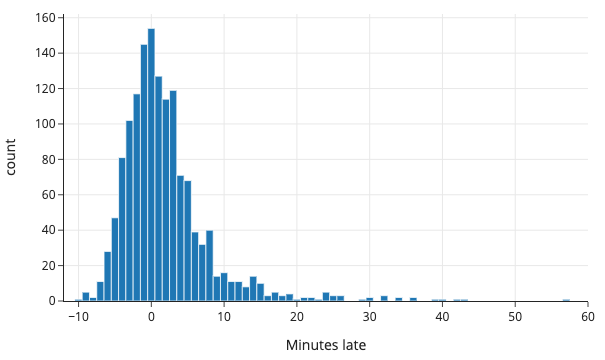

In [3]:
fig = px.histogram(times, x='minutes_late', width=450, height=250)
fig.update_xaxes(range=[-12, 60], title_text='Minutes late')
fig

We can already see some interesting patterns in the data. For example, many buses arrive earlier than scheduled, but some are well over 20 minutes late. We also see a clear mode (high point) at 0, meaning many buses arrive roughly on time.

To understand how late a bus on this route typically is, we'd like to
summarize lateness by a constant---this is a statistic, a single number, like the mean,
median, or mode. Let's find each of these summary statistics for the `minutes_late` column in the data table.

From the histogram, we estimate the mode of the data to be 0, and we use
Python to compute the mean and median:

In [5]:
print(f"mean:    {times['minutes_late'].mean():.2f} mins late")
print(f"median:  {times['minutes_late'].median():.2f} mins late")
print(f"mode:    {0:.2f} mins late")

mean:    1.92 mins late
median:  0.74 mins late
mode:    0.00 mins late


Naturally, we want to know which of these numbers best represents a summary of lateness. 
Rather than relying on rules of thumb, we take a more formal approach. We make a constant model for bus lateness. Let's call this constant $ \theta $ (in modeling, $\theta$ is often referred to as a *parameter*).
For example, if we consider $ \theta = 5 $, then our model approximates the bus to typically 
be five minutes late.

Now, $ \theta = 5 $ isn't a particularly good guess. From the histogram of minutes late, we saw that there are many more points closer to 0 than 5. 
But it isn't clear that $\theta = 0$ (the mode) is a better choice than
$\theta = 0.74$ (the median), $ \theta = 1.92 $ (the mean), or something else entirely.
To make choices between different values of $ \theta $, we would like to
assign any value of $\theta$ a score that measures how well that constant fits the data. 
That is, we want to assess the loss involved in approximating the data by a constant, like $ \theta = 5 $.
And ideally, we want to pick the constant that best fits our data, meaning the constant that has the smallest loss. In the next section, we describe more formally what we mean by loss and show how to use it to fit a model.